In [148]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import pandas as pd
from scipy import stats
from scipy.stats import norm

# Dados de entrada
df = pd.read_csv("C:/Users/Mariana/Dropbox (Pessoal)/1º sem 2020/MBA/Dados/ALAT.csv", sep = ',', na_values = '-', encoding= 'unicode_escape')
padrao = df["Padrão"]
novo = df["Novo"]
df.describe()

,Padrão,Novo
count,40.000000,40.000000
mean,95.300000,104.575000
std,13.952667,15.807962
min,65.000000,75.000000
25%,85.000000,90.000000
50%,96.500000,106.500000
75%,104.500000,116.000000
max,120.000000,133.000000


In [149]:
# Descreve a variável padrao
np.median(padrao), np.mean(padrao), np.std(padrao,ddof=1), np.min(padrao), np.max(padrao)

(96.5, 95.3, 13.952667238808612, 65, 120)

In [150]:
# Descreve a variável novo
np.median(novo), np.mean(novo), np.std(novo,ddof=1), np.min(novo), np.max(novo)

(106.5, 104.575, 15.807962128834527, 75, 133)

In [151]:
# Teste de Levene para igualdade de variâncias
stats.levene(padrao,novo)

LeveneResult(statistic=0.5839724701580812, pvalue=0.44706504115188817)

In [152]:
# Faz um teste t de Student comparando médias de novo e padrao
stats.ttest_ind(padrao,novo, equal_var = True)

Ttest_indResult(statistic=-2.782111467812002, pvalue=0.006770071773719045)

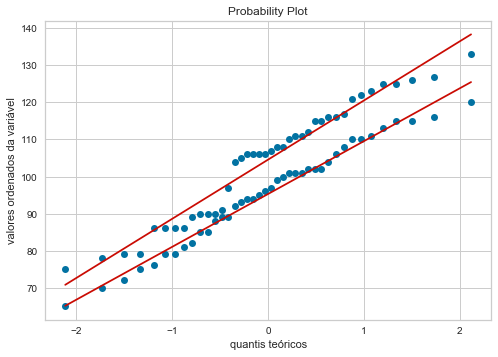

In [153]:
# Gráfico de probabilidade da Normal, para checar suposição de tal distribuição dos dados
stats.probplot(novo, plot=plt)
stats.probplot(padrao, plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('valores ordenados da variável')
plt.show()

Repare que há dependência entre os dados observados num mesmo cão. O próprio gráfico reflete isso, além de ser uma constatação intuitiva. Por essa razão, deve-se pensar em trabalhar com as diferenças dos pares de valores.

Text(0.5, 1.0, 'Experimento ALAT')

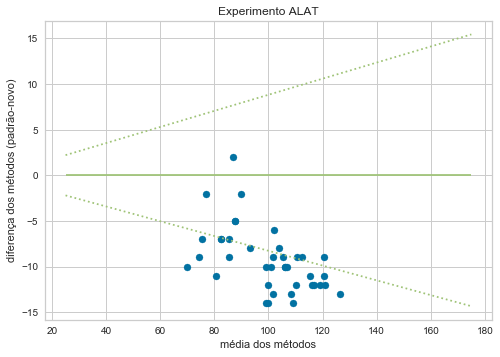

In [154]:
dif = padrao-novo
media = (padrao+novo)/2

# Cálculo dos limites de precisã, levando em consideração os erros de medida dos métodos
inf = [-25*.0882,-175*.082]
sup = [25*.0882,175*.0882]
ax = [25,175]

# Gráfico da diferença em função da média dos métodos
plt.scatter(media,dif)
plt.hlines(0,xmin=25,xmax=175,color='g')
plt.plot(ax,inf,'g:')
plt.plot(ax,sup,'g:')
plt.xlabel("média dos métodos")
plt.ylabel("diferença dos métodos (padrão-novo)")
plt.title("Experimento ALAT")

In [155]:
np.mean(dif), np.std(dif,ddof=1)

(-9.275, 3.4714033222374243)

In [156]:
# Faz um teste t de Student PAREADO comparando médias de novo e padrao
stats.ttest_rel(padrao,novo) 

Ttest_relResult(statistic=-16.898137482427465, pvalue=1.5340303096582e-19)

In [157]:
# O t de Student PAREADO é equivalente a testar se a média da diferença entre as variáveis é zero
stats.ttest_1samp(dif, 0)

Ttest_1sampResult(statistic=-16.898137482427465, pvalue=1.5340303096582e-19)

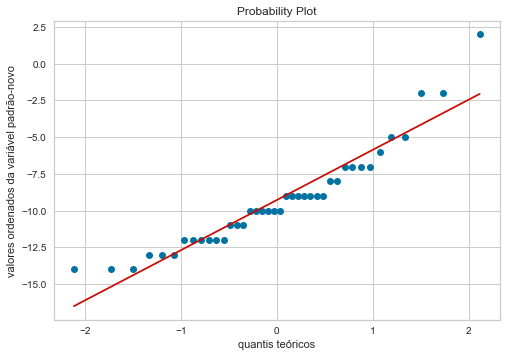

In [158]:
# Gráfico de probabilidade da Normal, para checar suposição de tal distribuição dos dados
stats.probplot(dif, plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('valores ordenados da variável padrão-novo')
plt.show()

Se a suposição de normalidade não for satisfeita, pode-se fazer o teste de sinais de Wilcoxon (para dados pareados)

In [159]:
# Teste de sinais de Wilcoxon sign-rank Wilcoxon test)
stats.wilcoxon(padrao,novo)

WilcoxonResult(statistic=2.0, pvalue=3.937981800408753e-08)

O teste não paramétrico equivalente ao t de Student para duas amostras independentes é o teste de Mann–Whitney (ou sum rank test)
Pode-se usar o comando scipy.stats.mannwhitneyu() para realizá-lo

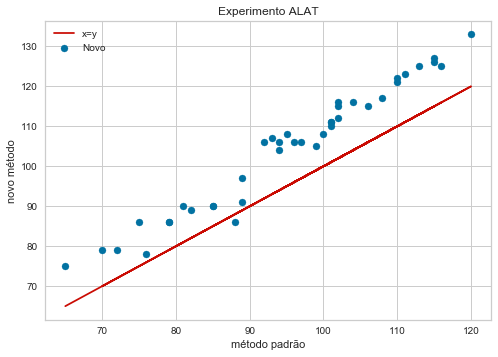

In [160]:
# Constrói o gráfico de dispersão
plt.scatter(x=padrao,y=novo)
plt.xlabel("método padrão")
plt.ylabel("novo método")
plt.title("Experimento ALAT")

# Desenha a reta de igualdade das duas medidas
plt.plot(padrao, padrao, 'k-', color = 'r', label="x=y")
plt.legend()
plt.show()

In [161]:
#Calcula o coeficiente de correlação de Pearson
cor,pvalor = stats.pearsonr(padrao,novo)
print('Coeficiente de correlação:' ,cor)
print('p-valor (H0: correlação igual a 0):' ,pvalor)

Coeficiente de correlação: 0.9804851386843999
p-valor (H0: correlação igual a 0): 1.8746448220612426e-28


    Coeficiente de correlação de concordância
    Mede concordância
    Mais detalhes em: https://en.wikipedia.org/wiki/Concordance_correlation_coefficient
    Artigo: Lawrence, I., and Kuei Lin. "A concordance correlation coefficient to evaluate
    reproducibility." Biometrics (1989): 255-268.  
    Parameters
    -----
    Interpretação: Valor entre [-1,1], sendo 1 concordância perfeita, similar ao coeficiente
    de correlação de Pearson

In [162]:
def coef_concord(y_true, y_pred,
                       sample_weight=None,
                       multioutput='uniform_average'):
    cor,sig = stats.pearsonr(y_true,y_pred)
    
    mean_true=np.mean(y_true)
    mean_pred=np.mean(y_pred)
    
    var_true=np.var(y_true)
    var_pred=np.var(y_pred)
    
    sd_true=np.std(y_true)
    sd_pred=np.std(y_pred)
    
    numerator=2*cor*sd_true*sd_pred

    denominator=var_true+var_pred+(mean_true-mean_pred)**2

    return numerator/denominator

print('Coeficiente de concordância:' ,coef_concord(novo,padrao))

Coeficiente de concordância: 0.8117829367829367


Ajustando o modelo de regressão linear simples

In [163]:
from statsmodels.formula.api import ols

mod = ols('Novo ~ Padrão',data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   Novo   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     945.2
Date:                Fri, 15 May 2020   Prob (F-statistic):           1.87e-28
Time:                        03:10:19   Log-Likelihood:                -101.61
No. Observations:                  40   AIC:                             207.2
Df Residuals:                      38   BIC:                             210.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2900      3.479     -0.371      0.7

Testes de hipóteses:

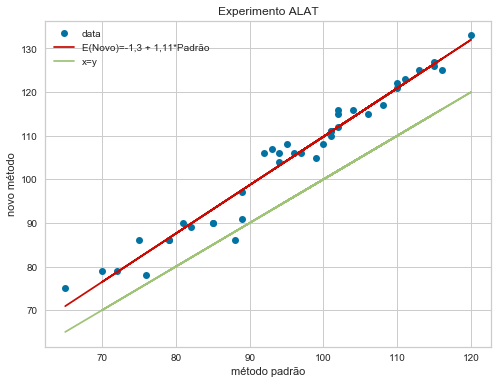

In [164]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(padrao, novo, 'o', label="data")
ax.plot(padrao, res.fittedvalues, 'r-', label="E(Novo)=-1,3 + 1,11*Padrão")
ax.plot(padrao, padrao, 'k-', color = 'g', label="x=y")
plt.xlabel("método padrão")
plt.ylabel("novo método")
plt.title("Experimento ALAT")
ax.legend(loc='best');

In [165]:
print(res.t_test([1, 0])), print(res.t_test([0, 1]))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            -1.2900      3.479     -0.371      0.713      -8.333       5.753
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.1109      0.036     30.744      0.000       1.038       1.184


(None, None)

Testes de hipóteses conjuntos sobre os parâmetros do modelo

In [166]:
# H0: intercepto = Padrão = 0
R = [[0, 1], [1, 0]]
print(np.array(R))
print(res.f_test(R))

[[0 1]
 [1 0]]
<F test: F=array([[22538.21340977]]), p=3.8361439848808773e-59, df_denom=38, df_num=2>


In [167]:
# H0: intercepto = 0 (repare que este teste é equivalente ao teste com a estatística t: F=t*t)
R = [[1, 0]]
print(np.array(R))
print(res.f_test(R))

[[1 0]]
<F test: F=array([[0.13748233]]), p=0.7128559230941551, df_denom=38, df_num=1>


In [168]:
# H0: Padrão = 1
print(res.f_test("Padrão = 1"))

<F test: F=array([[9.41381659]]), p=0.003958927322852896, df_denom=38, df_num=1>


Obtendo os valores preditos (valores ajustados):

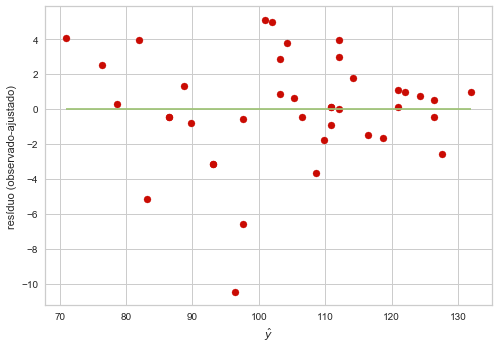

In [169]:
ypred=res.fittedvalues
residuo = res.resid # este é o resíduo=observado-ajustado=novo-ypred
plt.scatter(ypred,residuo, color='r')
plt.hlines(0,xmin=min(ypred),xmax=max(ypred),color='g')
plt.ylabel("resíduo (observado-ajustado)")
plt.xlabel(r'$\hat{y}$')
plt.show()

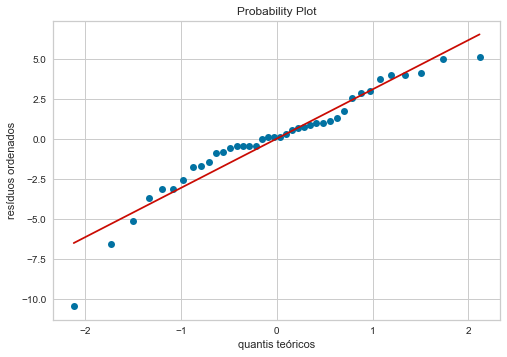

In [170]:
# Gráfico de probabilidade da Normal dos resíduos
stats.probplot(residuo, plot=plt)
plt.xlabel('quantis teóricos')
plt.ylabel('resíduos ordenados')
plt.show()

Encontrando (Raiz) Erro Quadrático Médio

In [172]:
from statsmodels.tools.eval_measures import rmse

rmse = rmse(df.Novo, ypred)
print("Raiz MSE: ", rmse)

Raiz MSE:  3.0686455212903536


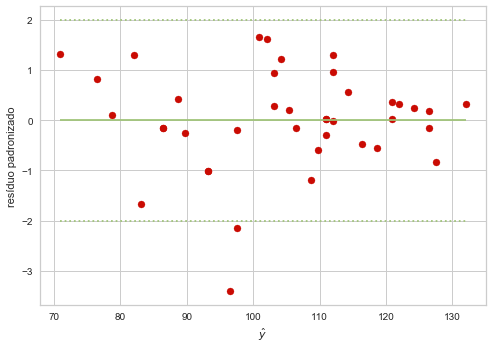

In [173]:
# Resíduos padronizado (dividido por rmse)
std_res = residuo/rmse
plt.scatter(ypred,std_res, color='r')
plt.hlines(0,xmin=min(ypred),xmax=max(ypred),color='g')
plt.hlines(-2,xmin=min(ypred),xmax=max(ypred),color='g',linestyles='dotted')
plt.hlines(2,xmin=min(ypred),xmax=max(ypred),color='g',linestyles='dotted')
plt.ylabel("resíduo padronizado")
plt.xlabel(r'$\hat{y}$')
plt.show()